# Lidar package example

The lidar package recommends that you use python version 3.8. You might be able to get away with other versions if you get the correct version of GDAL because Colab was using python 3.10.

In [1]:
!python --version

Python 3.8.18


In [2]:
import os
import zipfile
import tarfile
import shutil
import urllib.request
from pathlib import Path

import imageio.v2 as imageio
import lidar
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

Create a directory for all of the input, output, and other data.

In [4]:
work_dir = Path(".") / "lidar"
os.makedirs(work_dir, exist_ok=True)

Note that I put the `dem.tif` file into a `mosquito-dem` folder and then zipped that directory.

In [5]:
zip_path = work_dir / "mosquito-dem.zip"

print(f"Unzipping {zip_path.stem} ...")

with zipfile.ZipFile(zip_path, "r") as zippy:
    zippy.extractall(work_dir)

print(f"Data directory: {zip_path.stem}")

Unzipping mosquito-dem ...
Data directory: mosquito-dem


In [6]:
data_dir = work_dir / "mosquito-dem"
os.listdir(data_dir)

['dem.tif']

Put output here.

In [7]:
out_dir = work_dir / "output"
os.makedirs(out_dir, exist_ok=True)

## Modified from the website's tutorial.

In this simple example, we smooth dem.tif using a median filter. Then we extract sinks (i.e., depressions) from the DEM. Finally, we delineate nested depression hierarchy using the level-set algorithm.

Set parameters for the level-set algorithm.

In [8]:
min_size = 1000  # minimum number of pixels as a depression
min_depth = 0.3  # minimum depth as a depression
interval = 0.3  # slicing interval for the level-set method
bool_shp = False  # output shapefiles for each individual level

Smooth the original DEM using a median filter.

In [9]:
# extracting sinks based on user-defined minimum depression size
in_dem = str(data_dir / "dem.tif")
out_dem = str(out_dir / "median.tif")
in_dem = lidar.MedianFilter(in_dem, kernel_size=3, out_file=out_dem)

Median filtering ...
Run time: 24.2619 seconds
Saving dem ...


Extract DEM sinks using a depression-filling algorithm.

In [10]:
sink = lidar.ExtractSinks(in_dem, min_size, out_dir)

Loading data ...
min = 0.00, max = 53.13, no_data = -3.4028234663852886e+38, cell_size = 3.0
Depression filling ...



A Priority-Flood (Zhou2016 version)
C Zhou, G., Sun, Z., Fu, S., 2016. An efficient variant of the Priority-Flood algorithm for filling depressions in raster digital elevation models. Computers & Geosciences 90, Part A, 87 – 96. doi:http://dx.doi.org/10.1016/j.cageo.2016.02.021

t Zhou2016 wall-time = 23.9186 s


Saving filled dem ...
Region grouping ...
Computing properties ...
Saving sink dem ...
Saving refined dem ...
Converting raster to vector ...
Total run time:			 120.6332 s



Identify depression nested hierarchy using the level-set algorithm.

In [11]:
dep_id, dep_level = lidar.DelineateDepressions(
    sink, min_size, min_depth, interval, out_dir, bool_shp
)

Reading data ...
rows, cols: (41668, 19981)
Pixel resolution: 3.0
Read data time: 0.7328 seconds
Data preparation time: 10.1155 seconds
Total number of regions: 5034
Processing Region # 1 ...
Processing Region # 2 ...
Processing Region # 3 ...
Processing Region # 4 ...
Processing Region # 5 ...
Processing Region # 6 ...
Processing Region # 7 ...
Processing Region # 8 ...
Processing Region # 9 ...
Processing Region # 10 ...
Processing Region # 11 ...
Processing Region # 12 ...
Processing Region # 13 ...
Processing Region # 14 ...
Processing Region # 15 ...
Processing Region # 16 ...
Processing Region # 17 ...
Processing Region # 18 ...
Processing Region # 19 ...
Processing Region # 20 ...
Processing Region # 21 ...
Processing Region # 22 ...
Processing Region # 23 ...
Processing Region # 24 ...
Processing Region # 25 ...
Processing Region # 26 ...
Processing Region # 27 ...
Processing Region # 28 ...
Processing Region # 29 ...
Processing Region # 30 ...
Processing Region # 31 ...
Proces

Processing Region # 305 ...
Processing Region # 306 ...
Processing Region # 307 ...
Processing Region # 308 ...
Processing Region # 309 ...
Processing Region # 310 ...
Processing Region # 311 ...
Processing Region # 312 ...
Processing Region # 313 ...
Processing Region # 314 ...
Processing Region # 315 ...
Processing Region # 316 ...
Processing Region # 317 ...
Processing Region # 318 ...
Processing Region # 319 ...
Processing Region # 320 ...
Processing Region # 321 ...
Processing Region # 322 ...
Processing Region # 323 ...
Processing Region # 324 ...
Processing Region # 325 ...
Processing Region # 326 ...
Processing Region # 327 ...
Processing Region # 328 ...
Processing Region # 329 ...
Processing Region # 330 ...
Processing Region # 331 ...
Processing Region # 332 ...
Processing Region # 333 ...
Processing Region # 334 ...
Processing Region # 335 ...
Processing Region # 336 ...
Processing Region # 337 ...
Processing Region # 338 ...
Processing Region # 339 ...
Processing Region # 

Processing Region # 606 ...
Processing Region # 607 ...
Processing Region # 608 ...
Processing Region # 609 ...
Processing Region # 610 ...
Processing Region # 611 ...
Processing Region # 612 ...
Processing Region # 613 ...
Processing Region # 614 ...
Processing Region # 615 ...
Processing Region # 616 ...
Processing Region # 617 ...
Processing Region # 618 ...
Processing Region # 619 ...
Processing Region # 620 ...
Processing Region # 621 ...
Processing Region # 622 ...
Processing Region # 623 ...
Processing Region # 624 ...
Processing Region # 625 ...
Processing Region # 626 ...
Processing Region # 627 ...
Processing Region # 628 ...
Processing Region # 629 ...
Processing Region # 630 ...
Processing Region # 631 ...
Processing Region # 632 ...
Processing Region # 633 ...
Processing Region # 634 ...
Processing Region # 635 ...
Processing Region # 636 ...
Processing Region # 637 ...
Processing Region # 638 ...
Processing Region # 639 ...
Processing Region # 640 ...
Processing Region # 

Processing Region # 907 ...
Processing Region # 908 ...
Processing Region # 909 ...
Processing Region # 910 ...
Processing Region # 911 ...
Processing Region # 912 ...
Processing Region # 913 ...
Processing Region # 914 ...
Processing Region # 915 ...
Processing Region # 916 ...
Processing Region # 917 ...
Processing Region # 918 ...
Processing Region # 919 ...
Processing Region # 920 ...
Processing Region # 921 ...
Processing Region # 922 ...
Processing Region # 923 ...
Processing Region # 924 ...
Processing Region # 925 ...
Processing Region # 926 ...
Processing Region # 927 ...
Processing Region # 928 ...
Processing Region # 929 ...
Processing Region # 930 ...
Processing Region # 931 ...
Processing Region # 932 ...
Processing Region # 933 ...
Processing Region # 934 ...
Processing Region # 935 ...
Processing Region # 936 ...
Processing Region # 937 ...
Processing Region # 938 ...
Processing Region # 939 ...
Processing Region # 940 ...
Processing Region # 941 ...
Processing Region # 

Processing Region # 1213 ...
Processing Region # 1214 ...
Processing Region # 1215 ...
Processing Region # 1216 ...
Processing Region # 1217 ...
Processing Region # 1218 ...
Processing Region # 1219 ...
Processing Region # 1220 ...
Processing Region # 1221 ...
Processing Region # 1222 ...
Processing Region # 1223 ...
Processing Region # 1224 ...
Processing Region # 1225 ...
Processing Region # 1226 ...
Processing Region # 1227 ...
Processing Region # 1228 ...
Processing Region # 1229 ...
Processing Region # 1230 ...
Processing Region # 1231 ...
Processing Region # 1232 ...
Processing Region # 1233 ...
Processing Region # 1234 ...
Processing Region # 1235 ...
Processing Region # 1236 ...
Processing Region # 1237 ...
Processing Region # 1238 ...
Processing Region # 1239 ...
Processing Region # 1240 ...
Processing Region # 1241 ...
Processing Region # 1242 ...
Processing Region # 1243 ...
Processing Region # 1244 ...
Processing Region # 1245 ...
Processing Region # 1246 ...
Processing Reg

Processing Region # 1499 ...
Processing Region # 1500 ...
Processing Region # 1501 ...
Processing Region # 1502 ...
Processing Region # 1503 ...
Processing Region # 1504 ...
Processing Region # 1505 ...
Processing Region # 1506 ...
Processing Region # 1507 ...
Processing Region # 1508 ...
Processing Region # 1509 ...
Processing Region # 1510 ...
Processing Region # 1511 ...
Processing Region # 1512 ...
Processing Region # 1513 ...
Processing Region # 1514 ...
Processing Region # 1515 ...
Processing Region # 1516 ...
Processing Region # 1517 ...
Processing Region # 1518 ...
Processing Region # 1519 ...
Processing Region # 1520 ...
Processing Region # 1521 ...
Processing Region # 1522 ...
Processing Region # 1523 ...
Processing Region # 1524 ...
Processing Region # 1525 ...
Processing Region # 1526 ...
Processing Region # 1527 ...
Processing Region # 1528 ...
Processing Region # 1529 ...
Processing Region # 1530 ...
Processing Region # 1531 ...
Processing Region # 1532 ...
Processing Reg

Processing Region # 1784 ...
Processing Region # 1785 ...
Processing Region # 1786 ...
Processing Region # 1787 ...
Processing Region # 1788 ...
Processing Region # 1789 ...
Processing Region # 1790 ...
Processing Region # 1791 ...
Processing Region # 1792 ...
Processing Region # 1793 ...
Processing Region # 1794 ...
Processing Region # 1795 ...
Processing Region # 1796 ...
Processing Region # 1797 ...
Processing Region # 1798 ...
Processing Region # 1799 ...
Processing Region # 1800 ...
Processing Region # 1801 ...
Processing Region # 1802 ...
Processing Region # 1803 ...
Processing Region # 1804 ...
Processing Region # 1805 ...
Processing Region # 1806 ...
Processing Region # 1807 ...
Processing Region # 1808 ...
Processing Region # 1809 ...
Processing Region # 1810 ...
Processing Region # 1811 ...
Processing Region # 1812 ...
Processing Region # 1813 ...
Processing Region # 1814 ...
Processing Region # 1815 ...
Processing Region # 1816 ...
Processing Region # 1817 ...
Processing Reg

Processing Region # 2086 ...
Processing Region # 2087 ...
Processing Region # 2088 ...
Processing Region # 2089 ...
Processing Region # 2090 ...
Processing Region # 2091 ...
Processing Region # 2092 ...
Processing Region # 2093 ...
Processing Region # 2094 ...
Processing Region # 2095 ...
Processing Region # 2096 ...
Processing Region # 2097 ...
Processing Region # 2098 ...
Processing Region # 2099 ...
Processing Region # 2100 ...
Processing Region # 2101 ...
Processing Region # 2102 ...
Processing Region # 2103 ...
Processing Region # 2104 ...
Processing Region # 2105 ...
Processing Region # 2106 ...
Processing Region # 2107 ...
Processing Region # 2108 ...
Processing Region # 2109 ...
Processing Region # 2110 ...
Processing Region # 2111 ...
Processing Region # 2112 ...
Processing Region # 2113 ...
Processing Region # 2114 ...
Processing Region # 2115 ...
Processing Region # 2116 ...
Processing Region # 2117 ...
Processing Region # 2118 ...
Processing Region # 2119 ...
Processing Reg

Processing Region # 2376 ...
Processing Region # 2377 ...
Processing Region # 2378 ...
Processing Region # 2379 ...
Processing Region # 2380 ...
Processing Region # 2381 ...
Processing Region # 2382 ...
Processing Region # 2383 ...
Processing Region # 2384 ...
Processing Region # 2385 ...
Processing Region # 2386 ...
Processing Region # 2387 ...
Processing Region # 2388 ...
Processing Region # 2389 ...
Processing Region # 2390 ...
Processing Region # 2391 ...
Processing Region # 2392 ...
Processing Region # 2393 ...
Processing Region # 2394 ...
Processing Region # 2395 ...
Processing Region # 2396 ...
Processing Region # 2397 ...
Processing Region # 2398 ...
Processing Region # 2399 ...
Processing Region # 2400 ...
Processing Region # 2401 ...
Processing Region # 2402 ...
Processing Region # 2403 ...
Processing Region # 2404 ...
Processing Region # 2405 ...
Processing Region # 2406 ...
Processing Region # 2407 ...
Processing Region # 2408 ...
Processing Region # 2409 ...
Processing Reg

Processing Region # 2674 ...
Processing Region # 2675 ...
Processing Region # 2676 ...
Processing Region # 2677 ...
Processing Region # 2678 ...
Processing Region # 2679 ...
Processing Region # 2680 ...
Processing Region # 2681 ...
Processing Region # 2682 ...
Processing Region # 2683 ...
Processing Region # 2684 ...
Processing Region # 2685 ...
Processing Region # 2686 ...
Processing Region # 2687 ...
Processing Region # 2688 ...
Processing Region # 2689 ...
Processing Region # 2690 ...
Processing Region # 2691 ...
Processing Region # 2692 ...
Processing Region # 2693 ...
Processing Region # 2694 ...
Processing Region # 2695 ...
Processing Region # 2696 ...
Processing Region # 2697 ...
Processing Region # 2698 ...
Processing Region # 2699 ...
Processing Region # 2700 ...
Processing Region # 2701 ...
Processing Region # 2702 ...
Processing Region # 2703 ...
Processing Region # 2704 ...
Processing Region # 2705 ...
Processing Region # 2706 ...
Processing Region # 2707 ...
Processing Reg

Processing Region # 2963 ...
Processing Region # 2964 ...
Processing Region # 2965 ...
Processing Region # 2966 ...
Processing Region # 2967 ...
Processing Region # 2968 ...
Processing Region # 2969 ...
Processing Region # 2970 ...
Processing Region # 2971 ...
Processing Region # 2972 ...
Processing Region # 2973 ...
Processing Region # 2974 ...
Processing Region # 2975 ...
Processing Region # 2976 ...
Processing Region # 2977 ...
Processing Region # 2978 ...
Processing Region # 2979 ...
Processing Region # 2980 ...
Processing Region # 2981 ...
Processing Region # 2982 ...
Processing Region # 2983 ...
Processing Region # 2984 ...
Processing Region # 2985 ...
Processing Region # 2986 ...
Processing Region # 2987 ...
Processing Region # 2988 ...
Processing Region # 2989 ...
Processing Region # 2990 ...
Processing Region # 2991 ...
Processing Region # 2992 ...
Processing Region # 2993 ...
Processing Region # 2994 ...
Processing Region # 2995 ...
Processing Region # 2996 ...
Processing Reg

Processing Region # 3248 ...
Processing Region # 3249 ...
Processing Region # 3250 ...
Processing Region # 3251 ...
Processing Region # 3252 ...
Processing Region # 3253 ...
Processing Region # 3254 ...
Processing Region # 3255 ...
Processing Region # 3256 ...
Processing Region # 3257 ...
Processing Region # 3258 ...
Processing Region # 3259 ...
Processing Region # 3260 ...
Processing Region # 3261 ...
Processing Region # 3262 ...
Processing Region # 3263 ...
Processing Region # 3264 ...
Processing Region # 3265 ...
Processing Region # 3266 ...
Processing Region # 3267 ...
Processing Region # 3268 ...
Processing Region # 3269 ...
Processing Region # 3270 ...
Processing Region # 3271 ...
Processing Region # 3272 ...
Processing Region # 3273 ...
Processing Region # 3274 ...
Processing Region # 3275 ...
Processing Region # 3276 ...
Processing Region # 3277 ...
Processing Region # 3278 ...
Processing Region # 3279 ...
Processing Region # 3280 ...
Processing Region # 3281 ...
Processing Reg

Processing Region # 3547 ...
Processing Region # 3548 ...
Processing Region # 3549 ...
Processing Region # 3550 ...
Processing Region # 3551 ...
Processing Region # 3552 ...
Processing Region # 3553 ...
Processing Region # 3554 ...
Processing Region # 3555 ...
Processing Region # 3556 ...
Processing Region # 3557 ...
Processing Region # 3558 ...
Processing Region # 3559 ...
Processing Region # 3560 ...
Processing Region # 3561 ...
Processing Region # 3562 ...
Processing Region # 3563 ...
Processing Region # 3564 ...
Processing Region # 3565 ...
Processing Region # 3566 ...
Processing Region # 3567 ...
Processing Region # 3568 ...
Processing Region # 3569 ...
Processing Region # 3570 ...
Processing Region # 3571 ...
Processing Region # 3572 ...
Processing Region # 3573 ...
Processing Region # 3574 ...
Processing Region # 3575 ...
Processing Region # 3576 ...
Processing Region # 3577 ...
Processing Region # 3578 ...
Processing Region # 3579 ...
Processing Region # 3580 ...
Processing Reg

Processing Region # 3859 ...
Processing Region # 3860 ...
Processing Region # 3861 ...
Processing Region # 3862 ...
Processing Region # 3863 ...
Processing Region # 3864 ...
Processing Region # 3865 ...
Processing Region # 3866 ...
Processing Region # 3867 ...
Processing Region # 3868 ...
Processing Region # 3869 ...
Processing Region # 3870 ...
Processing Region # 3871 ...
Processing Region # 3872 ...
Processing Region # 3873 ...
Processing Region # 3874 ...
Processing Region # 3875 ...
Processing Region # 3876 ...
Processing Region # 3877 ...
Processing Region # 3878 ...
Processing Region # 3879 ...
Processing Region # 3880 ...
Processing Region # 3881 ...
Processing Region # 3882 ...
Processing Region # 3883 ...
Processing Region # 3884 ...
Processing Region # 3885 ...
Processing Region # 3886 ...
Processing Region # 3887 ...
Processing Region # 3888 ...
Processing Region # 3889 ...
Processing Region # 3890 ...
Processing Region # 3891 ...
Processing Region # 3892 ...
Processing Reg

Processing Region # 4182 ...
Processing Region # 4183 ...
Processing Region # 4184 ...
Processing Region # 4185 ...
Processing Region # 4186 ...
Processing Region # 4187 ...
Processing Region # 4188 ...
Processing Region # 4189 ...
Processing Region # 4190 ...
Processing Region # 4191 ...
Processing Region # 4192 ...
Processing Region # 4193 ...
Processing Region # 4194 ...
Processing Region # 4195 ...
Processing Region # 4196 ...
Processing Region # 4197 ...
Processing Region # 4198 ...
Processing Region # 4199 ...
Processing Region # 4200 ...
Processing Region # 4201 ...
Processing Region # 4202 ...
Processing Region # 4203 ...
Processing Region # 4204 ...
Processing Region # 4205 ...
Processing Region # 4206 ...
Processing Region # 4207 ...
Processing Region # 4208 ...
Processing Region # 4209 ...
Processing Region # 4210 ...
Processing Region # 4211 ...
Processing Region # 4212 ...
Processing Region # 4213 ...
Processing Region # 4214 ...
Processing Region # 4215 ...
Processing Reg

Processing Region # 4467 ...
Processing Region # 4468 ...
Processing Region # 4469 ...
Processing Region # 4470 ...
Processing Region # 4471 ...
Processing Region # 4472 ...
Processing Region # 4473 ...
Processing Region # 4474 ...
Processing Region # 4475 ...
Processing Region # 4476 ...
Processing Region # 4477 ...
Processing Region # 4478 ...
Processing Region # 4479 ...
Processing Region # 4480 ...
Processing Region # 4481 ...
Processing Region # 4482 ...
Processing Region # 4483 ...
Processing Region # 4484 ...
Processing Region # 4485 ...
Processing Region # 4486 ...
Processing Region # 4487 ...
Processing Region # 4488 ...
Processing Region # 4489 ...
Processing Region # 4490 ...
Processing Region # 4491 ...
Processing Region # 4492 ...
Processing Region # 4493 ...
Processing Region # 4494 ...
Processing Region # 4495 ...
Processing Region # 4496 ...
Processing Region # 4497 ...
Processing Region # 4498 ...
Processing Region # 4499 ...
Processing Region # 4500 ...
Processing Reg

Processing Region # 4772 ...
Processing Region # 4773 ...
Processing Region # 4774 ...
Processing Region # 4775 ...
Processing Region # 4776 ...
Processing Region # 4777 ...
Processing Region # 4778 ...
Processing Region # 4779 ...
Processing Region # 4780 ...
Processing Region # 4781 ...
Processing Region # 4782 ...
Processing Region # 4783 ...
Processing Region # 4784 ...
Processing Region # 4785 ...
Processing Region # 4786 ...
Processing Region # 4787 ...
Processing Region # 4788 ...
Processing Region # 4789 ...
Processing Region # 4790 ...
Processing Region # 4791 ...
Processing Region # 4792 ...
Processing Region # 4793 ...
Processing Region # 4794 ...
Processing Region # 4795 ...
Processing Region # 4796 ...
Processing Region # 4797 ...
Processing Region # 4798 ...
Processing Region # 4799 ...
Processing Region # 4800 ...
Processing Region # 4801 ...
Processing Region # 4802 ...
Processing Region # 4803 ...
Processing Region # 4804 ...
Processing Region # 4805 ...
Processing Reg

In [12]:
print(f"Results are saved in: {out_dir}")
print(os.listdir(out_dir))

Results are saved in: lidar/output
['regions.shp', 'dem_filled.tif', 'median.tif', 'depressions.prj', 'depression_level.tif', 'region.tif', 'depressions.shp', 'regions_info.csv', 'depression_id.tif', 'depressions_info.csv', 'dem.tif', 'regions.prj', 'depressions.shx', 'sink.tif', 'dem_diff.tif', 'depressions.dbf', 'regions.shx', 'regions.dbf', 'depth.tif']


### Displaying results

This section demonstrates how to display images on Jupyter Notebook. Three Python packages are used here, including matplotlib, imageio, and tifffile. These three packages can be installed using the following command:

pip install matplotlib imageio tifffile

Display one single image.

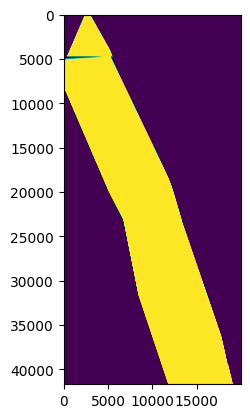

In [13]:
raster = imageio.imread(os.path.join(data_dir, 'dem.tif'))
plt.imshow(raster)
plt.show()

Read images as numpy arrays.

In [14]:
smoothed = imageio.imread(out_dir / "median.tif")
sink = imageio.imread(out_dir / "sink.tif")
dep_id = imageio.imread(out_dir / "depression_id.tif")
dep_level = imageio.imread(out_dir / "depression_level.tif")

Display multiple images in one plot.

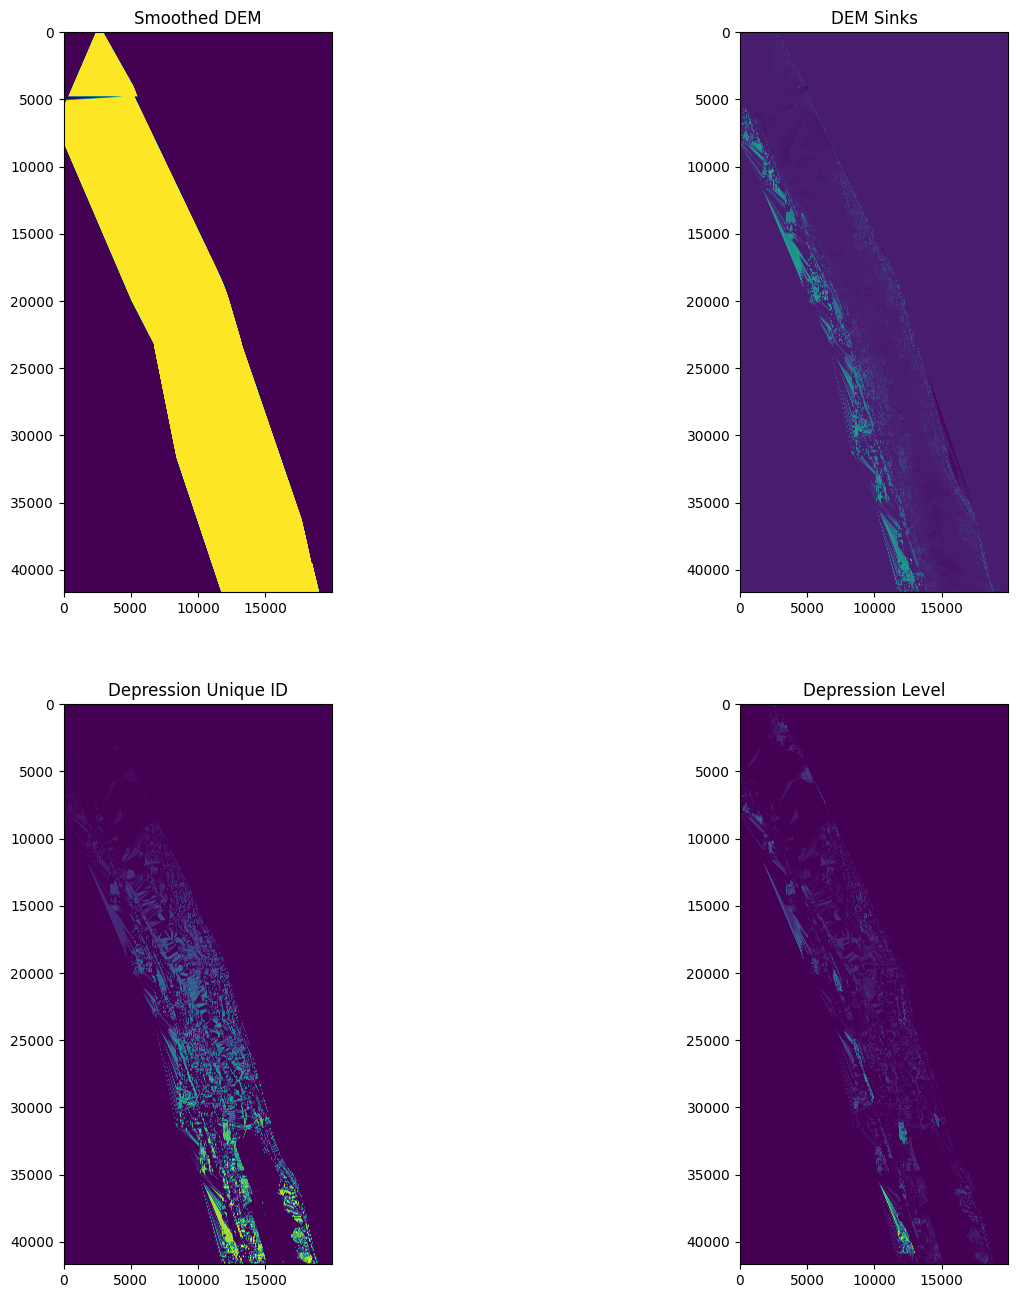

In [16]:
fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Smoothed DEM')
plt.imshow(smoothed)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('DEM Sinks')
plt.imshow(sink)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Depression Unique ID')
plt.imshow(dep_id)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Depression Level')
plt.imshow(dep_level)

plt.show()

### lidar GUI

lidar also provides a Graphical User Interface (GUI), which can be invoked using the following Python script. Note that the GUI might not work in Jupyter notebooks deployed on the cloud (e.g., MyBinder.org), but it should work on Jupyter notebooks on local computers.

```python
import lidar
lidar.gui()
```